# Aula 3 - Dados como apoio a tomada de decisão

---

### Data Warehouse

- Um **depósito** de dados 
    - É um repositório (ou arquivamento) de informações `colhidas de várias origens`, armazenadas sob um esquema unificado, em um único local.

- Uma vez reunidos os dados, eles são armazenados por muito tempo, permitindo o acesso a `dados históricos`.

- Os depósitos de dados oferecem ao usuário uma única interface consolidada para os dados, facilitando a escrita de consultas de apoio a decisão.

---

### OLAP x OLTP

- **OLAP** é a sigla em inglês para On-Line Anaytical Processing (Processamento Analítico On-Line) e significa que as informações são processadas para uma análise complexa
    - Exemplo: Data Warehouse 

- **OLTP** é On-Line Transaction Processing (Processamento de Transação On-Line) refere-se aos sistemas com os quais trabalhamos normalmente, ou seja, qualquer operação (inserção, alteração, ou exclusão) é executada de imediato no banco de dados utilizando-se transações.
    - Exemplos:
        1. Sistema de cadastro de clientes;
        2. CRM;
        3. Sistema de Gestão Empresarial (ERP - `Enterprise Resource Planning`).
---

### ***DATA MINING***

- O termo ``mineração de dados`` ou ``data mining`` refere-se, em geral, ao processo de analisar grandes bancos de dados para encontrar padrões úteis.

- Assim como a descoberta de conhecimento na inteligência artificial (também chamada ``aprendizado de máquina``) ou na análise estatística, a mineração de dados tenta descobrir regras e padrões a partir dos dados.

- Busca a descoberta do conhecimento nos bancos de dados.
---

> Segundo Silberschatz, Korth e Sudarshan (2020), um depósito de dados (Data Warehouse) é um repositório (ou arquivamento) de informações colhidas de várias origens, armazenadas sob um esquema unificado, em um único local.

- Uma vez reunidos, os dados são armazenados por muito tempo, permitindo o acesso a dados históricos.

- Assim, os depósitos de dados oferecem ao usuário uma única interface consolidada para os dados, facilitando a escrita de consultas de apoio à decisão.

- Além disso, acessando informações a partir de um depósito de dados, quem toma decisões pode garantir que os sistemas de processamento de transação on-line não serão afetados pela carga de trabalho de apoio à decisão.

- A Figura 1 mostra a arquitetura de um depósito de dados típico e ilustra a coleta, o armazenamento e o suporte da consulta e análise de dados. Entre as questões a serem enfrentadas na montagem de um depósito de dados, estão as seguintes:

- **Quando e como coletar dados**: em uma arquitetura controlada pela fonte para a coleta de dados, as fontes de dados transmitem novas informações, seja continuamente (quando ocorre o processamento da transação) ou periodicamente (à noite, por exemplo).
    - Já em uma arquitetura controlada por destino, o depósito de dados envia, periodicamente, solicitações para novos dados às fontes.
---
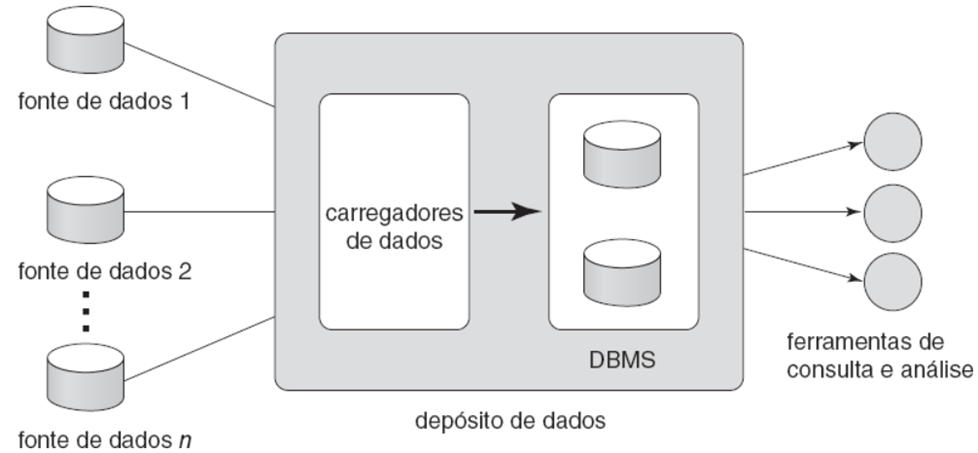

---

- Ainda conforme Silberschatz, Korth e Sudarshan (2020), a menos que as atualizações nas fontes sejam replicadas no depósito de forma síncrona, este nunca estará muito atualizado.

- A replicação síncrona pode ser **dispendiosa**, de modo que os depósitos de dados normalmente não a utilizam, realizando consultas somente sobre dados que são antigos o bastante para terem sido completamente replicados.

- Tradicionalmente, os analistas se satisfaziam com os dados do dia anterior, de tal forma que os depósitos de dados poderiam ser carregados com dados até o final do dia anterior.
    - Porém, cada vez mais organizações desejam dados mais atualizados.

> Os requisitos de atualidade dos dados variam conforme a aplicação.

- Dados de até algumas horas atrás podem ser suficientes para algumas aplicações; outras, que exigem respostas em tempo real a determinados eventos, podem usar a infraestrutura de processamento streaming no lugar de depender de uma infraestrutura de depósito de dados.

**Que esquema utilizar:** as fontes de dados que foram construídas de forma independente provavelmente terão diferentes esquemas.

- Na verdade, elas podem até mesmo usar diferentes modelos de dados.

- Parte da tarefa de um depósito é realizar a integração de esquema e converter dados para o esquema integrado antes que eles sejam armazenados.

- Como resultado, tem-se que os dados armazenados no depósito não são apenas uma cópia dos dados das fontes.

- Em vez disso, eles podem ser imaginados como uma visão materializada dos dados nas fontes.

**Transformação e limpeza de dados:** a tarefa de corrigir e pré-processar dados é chamada de ``limpeza de dados``.

- As fontes de dados normalmente entregam dados com diversas inconsistências menores, que podem ser corrigidas.

- Por exemplo, os nomes normalmente possuem erros de digitação, e os endereços podem ter erros em campos de rua/bairro/cidade ou códigos postais informados incorretamente.

- Eles podem ser corrigidos até certo ponto consultando-se um banco de dados de nomes de rua e códigos postais em cada cidade.

- A combinação aproximada de dados exigidos para essa tarefa é considerada como pesquisa difusa (``fuzzy lookup``).

> As listas de endereços coletadas de várias fontes podem ter duplicatas que precisam ser eliminadas em uma operação merge-purge (operação também conhecida como eliminação de duplicidade). Os registros para os vários indivíduos em uma casa podem ser agrupados de modo que apenas uma correspondência seja enviada para a residência; essa operação é chamada de householding.

---

- Os dados podem ser transformados de outras maneiras além da limpeza, como:
    - A mudança de unidades de medida ou a conversão para um esquema diferente, pela junção de dados de várias relações de origem.
    - Vale dizer que os depósitos de dados normalmente possuem ferramentas gráficas para dar suporte à transformação. Essas ferramentas permitem que a transformação seja especificada como caixas, e que linhas possam ser criadas entre elas para indicar o fluxo dos dados. As caixas condicionais podem, assim, direcionar os dados para um próximo passo apropriado na transformação. 

- **Como propagar atualizações:** as atualizações sobre as relações nas fontes de dados precisam ser propagadas para o depósito de dados.

    - Se as relações no depósito de dados forem exatamente as mesmas daquelas na fonte de dados, a propagação será direta. 
    - Se não forem, o problema de propagação de atualizações é, basicamente, o problema de manutenção de visão (view-maintenance).

- **Quais dados resumir:** os dados brutos gerados por um sistema de processamento de transação podem ser muito grandes para serem armazenados on-line.

    - Porém, podemos responder a muitas consultas mantendo apenas dados de resumo obtidos pela agregação sobre uma relação, em vez de manter a relação inteira.
    - Por exemplo, em lugar de armazenar dados sobre cada venda de roupas possível, podemos armazenar o total de vendas de roupas por nome e categoria do item.

---

#### ETL e ELT

> As diferentes etapas envolvidas na obtenção de dados para um depósito de dados são chamadas de tarefas de *extração*, *transformação* e *carga* (``ETL``);

- A _extração_ refere-se à obtenção de dados das fontes;
- Enquanto a _carga_ diz respeito à carga dos dados no depósito de dados.

- Nos depósitos de dados de última geração, que possuem suporte para funções definidas pelo usuário ou frameworks MapReduce, os dados podem ser ***extraídos***, ***carregados*** para o depósito e, **depois**, ***transformados***. A abordagem ``ELT`` permite, pois, o uso de frameworks de processamento paralelo para a transformação de dados. 

---

- Para Alves (2020), quando se fala em ***Data Warehouse***, é comum ouvirmos expressões como:
    - *OLAP*,
    - *OLTP* e
    - *Data Mining*.

- ``OLAP`` é a sigla em inglês para **On-Line Analytical Processing** (_Processamento Analítico On-Line_) e significa que as informações são processadas para uma análise complexa.

- Já o ``OLTP`` - **On-Line Transaction Processing** (_Processamento de Transação On-Line_) refere-se aos sistemas com os quais trabalhamos normalmente, ou seja, qualquer operação:
    - inserção,
    - alteração ou
    - exclusão
        - Executada de imediato no banco de dados utilizando-se transações.

---

- De acordo com Silberschatz, Korth e Sudarshan (2020), o termo **mineração de dados** (ou *Data Mining*) relaciona-se, em geral, ao processo de analisar grandes bancos de dados para encontrar **_padrões úteis_**.

- Assim como a descoberta de conhecimento na inteligência artificial (também chamada aprendizado de máquina) ou na análise estatística, a mineração de dados tenta descobrir regras e padrões a partir dos dados.

- Porém, esta difere daquelas porque lida com grande volume de dados, armazenados principalmente em disco. Ou seja, a mineração de dados ocupa-se da descoberta de conhecimento nos bancos de dados (KDD).

---

#### Continuando...

- Alguns tipos de conhecimento descobertos em um banco de dados podem ser representados por um conjunto de regras.

- Eis um exemplo de uma regra citada informalmente: _“mulheres jovens com renda anual maior que $ 50.000 são as pessoas mais prováveis de comprar carros esportivos”_.

- É claro que essas regras não são universalmente verdadeiras e possuem graus de *“suporte”* e *“confiança”*, conforme veremos.

- Outros tipos de conhecimento são representados por equações relacionando diferentes variáveis entre si.

- De um modo geral, o conhecimento descoberto pela aplicação de técnicas de aprendizado de máquina em instâncias do passado em um banco de dados é representado por um modelo que é, então, usado para prever resultados para novas instâncias.

- Características ou atributos das instâncias são entradas para o modelo, e a saída de um modelo é uma previsão.

> Existem diversos padrões possíveis que podem ser úteis, e diferentes técnicas são utilizadas para encontrá-los. Estudaremos, a seguir, alguns exemplos de padrões e veremos como eles podem ser derivados automaticamente de um banco de dados.

- Normalmente, existe um componente manual para a mineração de dados, consistindo no pré-processamento dos dados para um formato aceitável para os algoritmos e no pós-processamento de padrões descobertos para encontrar outros que poderiam ser úteis.

- Também pode haver mais de um tipo de padrão que pode ser recuperado a partir de determinado banco de dados, e a interação manual pode ser necessária para selecionar aqueles aproveitáveis.

- Por esse motivo, a mineração de dados é, na realidade, um processo semiautomático na vida real. Porém, em nossa descrição, nos concentraremos em seu aspecto automático.
---

### Segundo Alves (2020)
- Os sistemas ``OLAP`` são projetados para atender às consultas que surgem em função das necessidades dos usuários no momento.
- Nessa tecnologia, os dados brutos são transformados em informações consistentes para tornar fácil sua compreensão por parte do usuário.
- Os depósitos de dados (*Data Warehouses*), assim, normalmente possuem esquemas que são projetados para análise de dados usando ferramentas do tipo ``OLAP``.


> As relações em um esquema de depósito de dados, em geral, podem ser classificadas como:
    
- Tabelas de fatos
- Tabelas de dimensão.
    
1. Tabelas de fatos registram informações sobre eventos individuais e, em geral, são muito grandes.

- Uma tabela registrando informações de vendas para um comércio varejista, com uma tupla para cada item vendido, é um exemplo típico de tabela de fatos.
- Os atributos na tabela de fatos podem ser classificados como atributos de dimensão ou atributos de medição.
- Os atributos de medição armazenam informação quantitativa, que pode ser agregada; em uma tabela vendas, eles incluiriam o número de itens vendidos e o preço dos itens.

2. Já os atributos de dimensão são dimensões sob as quais os atributos de medição, e os resumos destes, são agrupados e visualizados.

- Em uma tabela vendas, eles incluiriam:
    - Um identificador de item,
    - A data em que ele foi vendido,
    - Em que local (loja) foi comprado,
    - Qual cliente o comprou, e assim por diante.

---

> No sistema OLTP, os dados são acumulados a partir de transações diárias da empresa. 

- São dados que se encontram em seu estado “puro”, sem o devido tratamento para análise.

- Somente consultas preestabelecidas são possíveis nesse sistema.

- Desta forma, ele é definido como a fonte de dados para o Data Warehouse.

- Existe também outro termo com o qual nos deparamos frequentemente nesse contexto, o ``ODS`` – **Operational Data Store** (Depósito de Dados Operacional), que se refere a uma espécie de repositório de dados, similar a um Data Warehouse, mas que não coloca à disposição as informações para uma tomada de decisão.

---

> Imaginemos um laboratório farmacêutico cujo gerente de vendas precisa ter em mãos informações referentes aos produtos/medicamentos que mais têm saída em uma determinada época do ano (inverno, por exemplo).

- Com base nessas informações, ele deve decidir em qual linha vai atuar mais.

- Ele também precisa passar essas informações ao gerente de produção para que ele tome as providências necessárias para produzir em maior quantidade os produtos/medicamentos adequados; caso contrário, o fornecimento será prejudicado.

> A área responsável pelo transporte também deve ter conhecimento desse aumento na produção/venda para poder administrar os processos de entrega aos clientes (se for necessário, contratar mais transportadoras).

- Podemos, desta forma, perceber a importância de uma informação de boa qualidade.

- As informações devem ter um grau de precisão alto, pois podem interferir não apenas em um, mas em vários processos de gestão ou setores de uma empresa.

> Em resumo, a principal característica dos Data Warehouses é que eles são verdadeiros depósitos de dados integrados originados de várias fontes.

- Formam, assim, um modelo de dados **multidimensional**.

- Esse modelo é bem adequado às tecnologias disponíveis para suporte à tomada de decisão.

- Os dados que podem ser modelados usando atributos de dimensão e atributos de medida são chamados de dados multidimensionais.

---

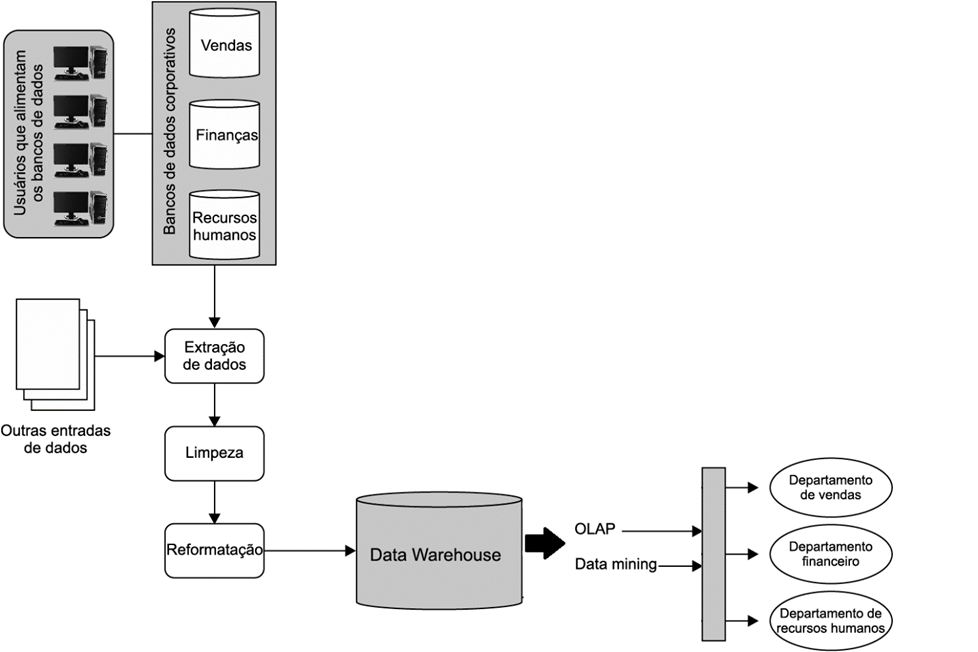

---

Referências

ALVES, W. P. Banco de dados: teoria e desenvolvimento. 2. ed. São Paulo: Érica, 2020.

ELMASRI, R.; NAVATHE, S. B. Sistemas de banco de dados. 7. ed. São Paulo: Pearson Education do Brasil, 2018.

MACHADO, F. N. R. Banco de dados: projeto e implementação. 4. ed. São Paulo: Érica, 2020.

SILBERSCHATZ, A.; KORTH, H.; SUDARSHAN, S. Sistema de banco de dados. 7. ed. Rio de Janeiro: LTC, 2020.

 ---
 # Busca com Chat GPT:

In [1]:
# Texto formatado para ser convertido em markdown
markdown_text = """
# Comparação entre OLAP e OLTP

OLAP (Processamento Analítico Online) e OLTP (Processamento de Transações Online) são dois tipos distintos de processamento de banco de dados, cada um com diferentes finalidades. Abaixo está uma comparação que destaca suas principais diferenças:

## 1. Propósito
- **OLAP**: Usado principalmente para fins *analíticos*, suportando consultas complexas para análise de dados, relatórios de negócios e tomada de decisões. Os sistemas OLAP são projetados para ajudar os usuários a analisar grandes volumes de dados de várias fontes.
- **OLTP**: Usado para fins *transacionais*, lidando com operações diárias em tempo real. Os sistemas OLTP são projetados para gerenciar um grande número de transações curtas, como inserir, atualizar, excluir e recuperar dados.

## 2. Processamento de Dados
- **OLAP**: Lida com *consultas complexas* que envolvem agregação, resumo e análise de dados. As consultas geralmente são intensivas em leitura e exigem muita computação.
- **OLTP**: Foca em *consultas simples* que leem e escrevem dados com frequência. Essas transações envolvem uma pequena quantidade de dados e são processadas rapidamente.

## 3. Design do Banco de Dados
- **OLAP**: Usa *esquemas estrela, floco de neve ou constelação de fatos* para estruturar os dados em cubos multidimensionais. Os dados são frequentemente desnormalizados para melhorar o desempenho das consultas.
- **OLTP**: Usa um *esquema altamente normalizado* (3FN) para reduzir a redundância e garantir a integridade dos dados durante transações frequentes.

## 4. Volume de Dados
- **OLAP**: Projetado para gerenciar e analisar grandes volumes de dados, muitas vezes dados históricos abrangendo meses ou anos.
- **OLTP**: Lida com conjuntos de dados menores, geralmente representando transações em tempo real ou recentes, com dados sendo frequentemente substituídos ou atualizados.

## 5. Usuários
- **OLAP**: Utilizado por *analistas, tomadores de decisão* e executivos que precisam realizar análises aprofundadas de dados, gerar relatórios e tomar decisões estratégicas.
- **OLTP**: Utilizado por *funcionários, clientes* e usuários operacionais que realizam tarefas diárias, como inserir pedidos, atualizar inventário ou processar pagamentos.

## 6. Operações
- **OLAP**: Executa operações predominantemente *intensivas em leitura*, com consultas complexas que envolvem agregação, detalhamento e análise de dados em várias dimensões.
- **OLTP**: Envolve operações *intensivas em escrita*, lidando com inserções, atualizações e exclusões frequentes com alto desempenho.

## 7. Tipos de Transações
- **OLAP**: Geralmente envolve *processamento em lote* e consultas demoradas que podem levar tempo para serem executadas.
- **OLTP**: Lida com *transações curtas e atômicas*, onde cada transação deve ser processada em tempo real e é crítica para a continuidade dos negócios.

## 8. Consistência de Dados
- **OLAP**: *Consistência eventual* é aceitável em alguns casos, pois os dados são usados principalmente para fins analíticos e os relatórios podem estar ligeiramente atrasados em relação aos dados em tempo real.
- **OLTP**: *Consistência forte* é crítica, garantindo que cada transação reflita imediatamente os dados corretos para manter a integridade do sistema.

## 9. Otimização de Desempenho
- **OLAP**: Otimizado para *desempenho de consulta*, muitas vezes utilizando índices, visualizações materializadas e dados pré-agregados para acelerar a análise complexa.
- **OLTP**: Otimizado para *desempenho transacional*, garantindo um processamento rápido, confiável e eficiente de atualizações e inserções frequentes.

## 10. Exemplos de Casos de Uso
- **OLAP**: Armazenamento de dados, ferramentas de inteligência de negócios (BI), dashboards e aplicações de mineração de dados. Por exemplo, análise de tendências de vendas ao longo do tempo ou geração de relatórios de desempenho de toda a empresa.
- **OLTP**: Sistemas bancários, sites de comércio eletrônico, sistemas de reservas e sistemas de ponto de venda no varejo. Por exemplo, processar uma compra online ou atualizar o saldo da conta de um cliente em tempo real.

## 11. Backup e Recuperação
- **OLAP**: O backup é menos frequente, mas geralmente mais substancial, pois envolve grandes volumes de dados históricos.
- **OLTP**: Backups frequentes são essenciais para garantir a integridade e a disponibilidade dos dados em caso de falhas no sistema.

## Tabela Resumo:

| Característica               | OLAP                              | OLTP                             |
|------------------------------|------------------------------------|----------------------------------|
| **Propósito**                 | Processamento analítico            | Processamento transacional       |
| **Processamento de Dados**    | Consultas complexas, agregações    | Consultas simples, transações    |
| **Design do Banco de Dados**  | Desnormalizado, multidimensional   | Normalizado, relacional          |
| **Volume de Dados**           | Grandes volumes, dados históricos  | Menores volumes, dados em tempo real |
| **Usuários**                  | Analistas, tomadores de decisão    | Funcionários, usuários operacionais |
| **Operações**                 | Intensivo em leitura, analítico    | Intensivo em escrita, transacional |
| **Tipo de Transação**         | Processamento em lote, consultas longas | Transações curtas, atômicas      |
| **Consistência de Dados**     | Consistência eventual aceitável    | Consistência forte necessária    |
| **Otimização**                | Desempenho de consulta             | Desempenho transacional          |
| **Exemplo de Caso de Uso**    | Inteligência de negócios, relatórios | Bancos, e-commerce               |

Tanto os sistemas OLAP quanto os OLTP são essenciais para as operações de negócios, com o OLTP suportando as atividades diárias e o OLAP fornecendo insights para decisões estratégicas.
"""

# Salvando o texto em um arquivo markdown
file_path = "c:/Users/USER/OneDrive/Documentos/Python Scripts/OLAP_vs_OLTP.md"
with open(file_path, "w") as file:
    file.write(markdown_text)

file_path

'c:/Users/USER/OneDrive/Documentos/Python Scripts/OLAP_vs_OLTP.md'

In [2]:
md_txt = """
# Aqui temos um título em markdown
- Um Bullet Point
> Uma quote ou citação
`Umm código`
```
Um
Bloco
De
Código
```
**Negrito**
_Itálico_
**_Negrito e Itálico juntos_**
"""
file_path = 'c:/Users/USER/OneDrive/Documentos/Python Scripts/Teste de Markdown com Python.md'
with open(file_path, 'w') as file:
    file.write(md_txt)


In [3]:
file_path

'c:/Users/USER/OneDrive/Documentos/Python Scripts/Teste de Markdown com Python.md'


# Comparação entre OLAP e OLTP

OLAP (Processamento Analítico Online) e OLTP (Processamento de Transações Online) são dois tipos distintos de processamento de banco de dados, cada um com diferentes finalidades. Abaixo está uma comparação que destaca suas principais diferenças:

## 1. Propósito
- **OLAP**: Usado principalmente para fins *analíticos*, suportando consultas complexas para análise de dados, relatórios de negócios e tomada de decisões. Os sistemas OLAP são projetados para ajudar os usuários a analisar grandes volumes de dados de várias fontes.
- **OLTP**: Usado para fins *transacionais*, lidando com operações diárias em tempo real. Os sistemas OLTP são projetados para gerenciar um grande número de transações curtas, como inserir, atualizar, excluir e recuperar dados.

## 2. Processamento de Dados
- **OLAP**: Lida com *consultas complexas* que envolvem agregação, resumo e análise de dados. As consultas geralmente são intensivas em leitura e exigem muita computação.
- **OLTP**: Foca em *consultas simples* que leem e escrevem dados com frequência. Essas transações envolvem uma pequena quantidade de dados e são processadas rapidamente.

## 3. Design do Banco de Dados
- **OLAP**: Usa *esquemas estrela, floco de neve ou constelação de fatos* para estruturar os dados em cubos multidimensionais. Os dados são frequentemente desnormalizados para melhorar o desempenho das consultas.
- **OLTP**: Usa um *esquema altamente normalizado* (3FN) para reduzir a redundância e garantir a integridade dos dados durante transações frequentes.

## 4. Volume de Dados
- **OLAP**: Projetado para gerenciar e analisar grandes volumes de dados, muitas vezes dados históricos abrangendo meses ou anos.
- **OLTP**: Lida com conjuntos de dados menores, geralmente representando transações em tempo real ou recentes, com dados sendo frequentemente substituídos ou atualizados.

## 5. Usuários
- **OLAP**: Utilizado por *analistas, tomadores de decisão* e executivos que precisam realizar análises aprofundadas de dados, gerar relatórios e tomar decisões estratégicas.
- **OLTP**: Utilizado por *funcionários, clientes* e usuários operacionais que realizam tarefas diárias, como inserir pedidos, atualizar inventário ou processar pagamentos.

## 6. Operações
- **OLAP**: Executa operações predominantemente *intensivas em leitura*, com consultas complexas que envolvem agregação, detalhamento e análise de dados em várias dimensões.
- **OLTP**: Envolve operações *intensivas em escrita*, lidando com inserções, atualizações e exclusões frequentes com alto desempenho.

## 7. Tipos de Transações
- **OLAP**: Geralmente envolve *processamento em lote* e consultas demoradas que podem levar tempo para serem executadas.
- **OLTP**: Lida com *transações curtas e atômicas*, onde cada transação deve ser processada em tempo real e é crítica para a continuidade dos negócios.

## 8. Consistência de Dados
- **OLAP**: *Consistência eventual* é aceitável em alguns casos, pois os dados são usados principalmente para fins analíticos e os relatórios podem estar ligeiramente atrasados em relação aos dados em tempo real.
- **OLTP**: *Consistência forte* é crítica, garantindo que cada transação reflita imediatamente os dados corretos para manter a integridade do sistema.

## 9. Otimização de Desempenho
- **OLAP**: Otimizado para *desempenho de consulta*, muitas vezes utilizando índices, visualizações materializadas e dados pré-agregados para acelerar a análise complexa.
- **OLTP**: Otimizado para *desempenho transacional*, garantindo um processamento rápido, confiável e eficiente de atualizações e inserções frequentes.

## 10. Exemplos de Casos de Uso
- **OLAP**: Armazenamento de dados, ferramentas de inteligência de negócios (BI), dashboards e aplicações de mineração de dados. Por exemplo, análise de tendências de vendas ao longo do tempo ou geração de relatórios de desempenho de toda a empresa.
- **OLTP**: Sistemas bancários, sites de comércio eletrônico, sistemas de reservas e sistemas de ponto de venda no varejo. Por exemplo, processar uma compra online ou atualizar o saldo da conta de um cliente em tempo real.

## 11. Backup e Recuperação
- **OLAP**: O backup é menos frequente, mas geralmente mais substancial, pois envolve grandes volumes de dados históricos.
- **OLTP**: Backups frequentes são essenciais para garantir a integridade e a disponibilidade dos dados em caso de falhas no sistema.

## Tabela Resumo:

| Característica               | OLAP                              | OLTP                             |
|------------------------------|------------------------------------|----------------------------------|
| **Propósito**                 | Processamento analítico            | Processamento transacional       |
| **Processamento de Dados**    | Consultas complexas, agregações    | Consultas simples, transações    |
| **Design do Banco de Dados**  | Desnormalizado, multidimensional   | Normalizado, relacional          |
| **Volume de Dados**           | Grandes volumes, dados históricos  | Menores volumes, dados em tempo real |
| **Usuários**                  | Analistas, tomadores de decisão    | Funcionários, usuários operacionais |
| **Operações**                 | Intensivo em leitura, analítico    | Intensivo em escrita, transacional |
| **Tipo de Transação**         | Processamento em lote, consultas longas | Transações curtas, atômicas      |
| **Consistência de Dados**     | Consistência eventual aceitável    | Consistência forte necessária    |
| **Otimização**                | Desempenho de consulta             | Desempenho transacional          |
| **Exemplo de Caso de Uso**    | Inteligência de negócios, relatórios | Bancos, e-commerce               |

Tanto os sistemas OLAP quanto os OLTP são essenciais para as operações de negócios, com o OLTP suportando as atividades diárias e o OLAP fornecendo insights para decisões estratégicas.
